In [1]:
!pip install pysal
!pip install esda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 74.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ..

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import esda
import pysal.lib

# Load shapefile data
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Kriminal/LAPD_Reporting_Districts.shp"

shapefile_path = dataset
gdf = gpd.read_file(dataset)

# Perform spatial data operations
# Create a spatial weights matrix
w = pysal.lib.weights.Queen.from_dataframe(gdf)

In [3]:
gdf.head(10)

,OBJECTID,REPDIST,PREC,APREC,BUREAU,BASICCAR,TOOLTIP,geometry
0,1,1901,19,MISSION,VALLEY BUREAU,19A1,Bureau: VALLEY BUREAU\nDistrict: 1901\nDivisio...,"POLYGON ((-118.50736 34.33464, -118.50381 34.3..."
1,2,1705,17,DEVONSHIRE,VALLEY BUREAU,17A35,Bureau: VALLEY BUREAU\nDistrict: 1705\nDivisio...,"POLYGON ((-118.50736 34.33464, -118.50668 34.3..."
2,3,1902,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1902\nDivisio...,"POLYGON ((-118.45182 34.32405, -118.44965 34.3..."
3,4,1903,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1903\nDivisio...,"POLYGON ((-118.45182 34.32405, -118.45201 34.3..."
4,5,1904,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1904\nDivisio...,"POLYGON ((-118.45182 34.32405, -118.45169 34.3..."
5,6,1906,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1906\nDivisio...,"POLYGON ((-118.41911 34.32319, -118.41959 34.3..."
6,7,1909,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1909\nDivisio...,"POLYGON ((-118.41911 34.32319, -118.41804 34.3..."
7,8,1912,19,MISSION,VALLEY BUREAU,19A1,Bureau: VALLEY BUREAU\nDistrict: 1912\nDivisio...,"POLYGON ((-118.46941 34.32303, -118.46938 34.3..."
8,9,1908,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1908\nDivisio...,"POLYGON ((-118.41911 34.32319, -118.41908 34.3..."
9,10,1905,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1905\nDivisio...,"POLYGON ((-118.43484 34.32087, -118.43423 34.3..."


In [4]:
# Read the ESRI Shapefile
shapefile_path = dataset
districts = gpd.read_file(shapefile_path)

# Read the CSV file
#csv_path = "/content/Crime_Data_2010_2017.csv"
csv_path = "https://media.githubusercontent.com/media/arifadli/DatasetRepository/main/Kriminal/Crime_Data_2010_2017.csv"

crime = pd.read_csv(csv_path)
crime.head(10)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"
5,120125367,01/08/2013,01/08/2013,1400,1,Central,111,110,CRIMINAL HOMICIDE,1243 2000 1813 1814 2002 0416 0400,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,110.0,NaN,NaN,NaN,600 N HILL ST,NaN,"(34.0591, -118.2412)"
6,101105609,01/28/2010,01/27/2010,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"(34.1211, -118.2048)"
7,101620051,11/11/2010,11/07/2010,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"(34.241, -118.3987)"
8,101910498,04/07/2010,04/07/2010,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"(34.3147, -118.4589)"
9,120908292,03/29/2013,01/15/2013,800,9,Van Nuys,904,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0344 1300,...,NaN,IC,Invest Cont,668.0,NaN,NaN,NaN,7200 SEPULVEDA BL,NaN,"(34.2012, -118.4662)"


In [5]:
import pandas as pd

# Menghitung frekuensi masing-masing nilai dalam kolom 'Reporting.District'
w = crime['Reporting District'].value_counts()

# Mengonversi hasil perhitungan ke dalam DataFrame
rep_dis = pd.DataFrame({'Var1': w.index, 'Freq': w.values})

# Menampilkan panjang unik dari kolom 'Var1'
panjang_unik = len(rep_dis['Var1'])
print(panjang_unik)

1280


In [6]:
# Menggabungkan DataFrames 'districts' dan 'rep_dis' berdasarkan kolom 'REPDIST' dan 'Var1'
districts = districts.merge(rep_dis, left_on='REPDIST', right_on='Var1', how='left')

# Mengganti nilai-nilai yang hilang (NA) dalam kolom 'Freq' dengan 0
districts['Freq'].fillna(0, inplace=True)

# Menampilkan panjang kolom 'Freq'
panjang_freq = len(districts['Freq'])
print(panjang_freq)

1135


In [7]:
rep_dis.head(100)

,Var1,Freq
0,363,8316
1,645,7670
2,2156,6694
3,646,6670
4,636,6481
...,...,...
95,1361,2806
96,2177,2801
97,2143,2790
98,1263,2786


#**Spatial Autocorrelation**

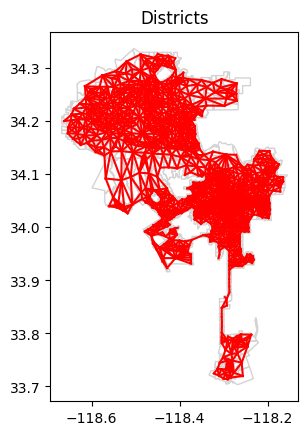

In [8]:
import geopandas as gpd
from libpysal import weights
import matplotlib.pyplot as plt

# Membaca data GeoDataFrame Anda
gdf = gpd.read_file(dataset)

# Membuat matriks tetangga dengan skema Queen
wq = weights.Queen.from_dataframe(gdf)

# Plot wilayah Anda
gdf.plot(edgecolor='lightgrey', facecolor='none')
plt.title('Districts')

# Plot tetangga (neighbors)
for i in range(len(wq.neighbors)):
    neighbors = wq.neighbors[i]
    for neighbor in neighbors:
        if i < neighbor:
            x1, y1 = gdf.geometry.iloc[i].centroid.xy
            x2, y2 = gdf.geometry.iloc[neighbor].centroid.xy
            plt.plot([x1[0], x2[0]], [y1[0], y2[0]], color='red')

plt.show()


In [9]:
import geopandas as gpd
from libpysal import weights
import matplotlib.pyplot as plt


# Mendapatkan informasi statistik tentang matriks tetangga
num_regions = wq.n
num_nonzero_links = wq.s0
percentage_nonzero_weights = wq.pct_nonzero
average_num_links = wq.mean_neighbors

# Menampilkan informasi statistik
print("Number of regions:", num_regions)
print("Number of nonzero links:", num_nonzero_links)
print("Percentage nonzero weights:", percentage_nonzero_weights)
print("Average number of links:", average_num_links)

Number of regions: 1135
Number of nonzero links: 7080.0
Percentage nonzero weights: 0.5495934328242349
Average number of links: 6.237885462555066


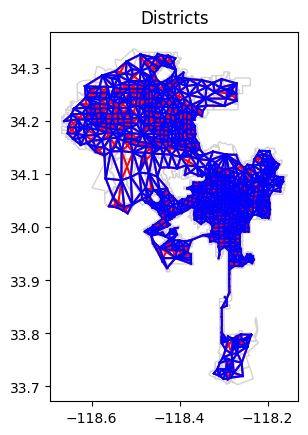

In [10]:
import geopandas as gpd
from libpysal import weights
import matplotlib.pyplot as plt

# Membaca data GeoDataFrame Anda
gdf = gpd.read_file(dataset)

# Membuat matriks tetangga dengan skema Queen
wq = weights.Queen.from_dataframe(gdf)

# Membuat matriks tetangga dengan skema Queen
wq_queen = weights.Queen.from_dataframe(gdf)

# Membuat matriks tetangga dengan skema Rook
wq_rook = weights.Rook.from_dataframe(gdf)

# Plot wilayah Anda
gdf.plot(edgecolor='lightgrey', facecolor='none')
plt.title('Districts')

# Plot tetangga (neighbors)

# Plot tetangga (neighbors) dengan skema Queen dengan warna merah

for i in range(len(wq_queen.neighbors)):
    neighbors = wq_queen.neighbors[i]
    for neighbor in neighbors:
        if i < neighbor:
            x1, y1 = gdf.geometry.iloc[i].centroid.xy
            x2, y2 = gdf.geometry.iloc[neighbor].centroid.xy
            plt.plot([x1[0], x2[0]], [y1[0], y2[0]], color='red')

for i in range(len(wq_rook.neighbors)):
    neighbors = wq_rook.neighbors[i]
    for neighbor in neighbors:
        if i < neighbor:
            x1, y1 = gdf.geometry.iloc[i].centroid.xy
            x2, y2 = gdf.geometry.iloc[neighbor].centroid.xy
            plt.plot([x1[0], x2[0]], [y1[0], y2[0]], color='blue')

plt.show()


In [11]:
print("Number of regions:", wq_queen.n)
print("Number of nonzero links:", wq_queen.s0)
print("Percentage nonzero weights:", wq_queen.pct_nonzero)
print("Average number of links:", wq_queen.mean_neighbors)

Number of regions: 1135
Number of nonzero links: 7080.0
Percentage nonzero weights: 0.5495934328242349
Average number of links: 6.237885462555066


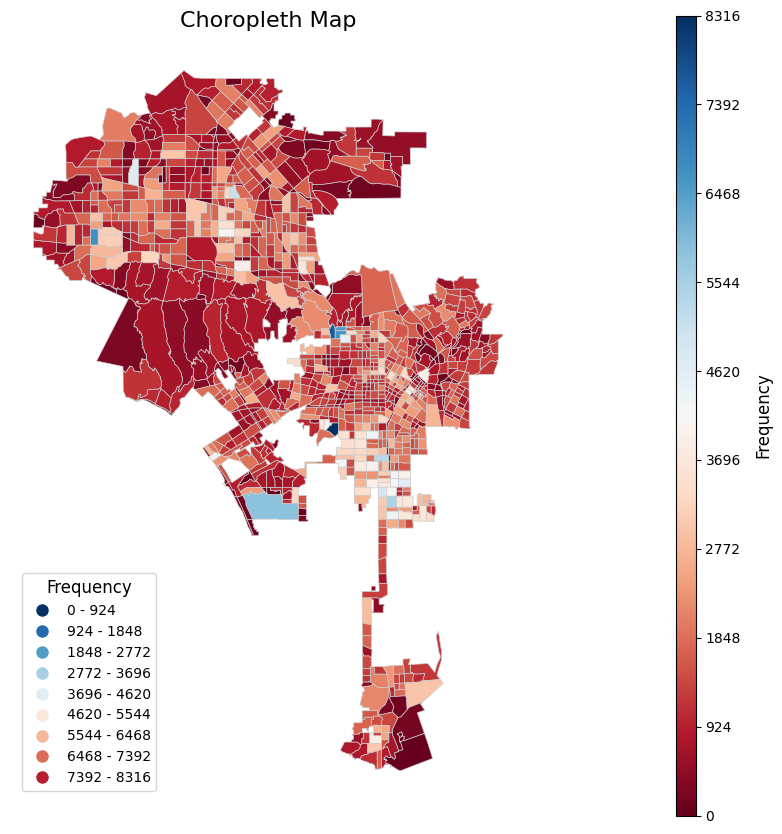

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import mapclassify as mc
from matplotlib.lines import Line2D

# Memilih kolom 'Freq' dari GeoDataFrame 'districts'
var = districts['Freq']

# Membuat rentang frekuensi sesuai dengan kebutuhan Anda
bins = [0, 924, 1848, 2772, 3696, 4620, 5544, 6468, 7392, var.max()]

# Menghitung class intervals menggunakan metode Quantiles dengan 10 kelas
q = mc.Quantiles(var, k=10)

# Menggunakan palet warna
my_colours = plt.cm.RdBu(np.linspace(0, 1, 10))[::-1]

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 10))
districts.plot(column='Freq', cmap='RdBu', ax=ax, linewidth=0.5, edgecolor='0.8', legend=False,
               facecolor=[my_colours[q.find_bin(value)] for value in var])

# Meng-custom plot
ax.set_axis_off()
plt.title("Choropleth Map", fontsize=16)

# Menambahkan colorbar vertikal dengan nilai yang lebih detil
cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  # Atur posisi dan ukuran colorbar

# Mengatur batas-batas interval pada colorbar sesuai yang Anda inginkan
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=var.min(), vmax=var.max())),
                  cax=cax, ticks=bins)

cb.set_label('Frequency', fontsize=12, labelpad=10)

# Membuat legenda dengan rentang nilai numerik
legend_labels = [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins) - 1)]
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label,
                          markersize=10, markerfacecolor=my_colours[i]) for i, label in enumerate(legend_labels)]
legend = ax.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(0.01, 0.01), fontsize=10, title="Frequency")
legend.get_title().set_fontsize(12)

plt.show()


**Number of regions**: Jumlah wilayah atau entitas dalam dataset Anda.<br>
**Number of nonzero links**: Jumlah tetangga yang ada. Ini adalah jumlah pasangan wilayah yang memiliki keterhubungan satu sama lain.<br>
**Percentage nonzero weights**: Persentase dari hubungan tetangga yang bukan nol dari keseluruhan kemungkinan hubungan. Ini mengukur sejauh mana wilayah-wilayah saling terhubung dalam dataset Anda.<br>
**Average number of links**: Rata-rata jumlah tetangga yang dimiliki oleh wilayah-wilayah dalam dataset Anda. Nilai ini memberikan gambaran tentang seberapa padat hubungan tetangga di antara wilayah-wilayah.

In [13]:
import libpysal
import geopandas as gpd

# Membaca data GeoDataFrame Anda
gdf = gpd.read_file(dataset)

# Menghitung matriks tetangga dengan skema Queen
wq = libpysal.weights.Queen.from_dataframe(gdf)

# Mendapatkan statistik tetangga
num_regions = len(wq.id_order)
num_nonzero_links = wq.n
percentage_nonzero_weights = wq.pct_nonzero
average_num_links = num_nonzero_links / num_regions

print(f"Number of regions: {num_regions}")
print(f"Number of nonzero links: {num_nonzero_links}")
print(f"Percentage nonzero weights: {percentage_nonzero_weights}")
print(f"Average number of links: {average_num_links}")


Number of regions: 1135
Number of nonzero links: 1135
Percentage nonzero weights: 0.5495934328242349
Average number of links: 1.0


#**Local Spatial Autocorrelation**

In [20]:
gdf.head(10)

,OBJECTID,REPDIST,PREC,APREC,BUREAU,BASICCAR,TOOLTIP,geometry
0,1,1901,19,MISSION,VALLEY BUREAU,19A1,Bureau: VALLEY BUREAU\nDistrict: 1901\nDivisio...,"POLYGON ((-118.50736 34.33464, -118.50381 34.3..."
1,2,1705,17,DEVONSHIRE,VALLEY BUREAU,17A35,Bureau: VALLEY BUREAU\nDistrict: 1705\nDivisio...,"POLYGON ((-118.50736 34.33464, -118.50668 34.3..."
2,3,1902,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1902\nDivisio...,"POLYGON ((-118.45182 34.32405, -118.44965 34.3..."
3,4,1903,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1903\nDivisio...,"POLYGON ((-118.45182 34.32405, -118.45201 34.3..."
4,5,1904,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1904\nDivisio...,"POLYGON ((-118.45182 34.32405, -118.45169 34.3..."
5,6,1906,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1906\nDivisio...,"POLYGON ((-118.41911 34.32319, -118.41959 34.3..."
6,7,1909,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1909\nDivisio...,"POLYGON ((-118.41911 34.32319, -118.41804 34.3..."
7,8,1912,19,MISSION,VALLEY BUREAU,19A1,Bureau: VALLEY BUREAU\nDistrict: 1912\nDivisio...,"POLYGON ((-118.46941 34.32303, -118.46938 34.3..."
8,9,1908,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1908\nDivisio...,"POLYGON ((-118.41911 34.32319, -118.41908 34.3..."
9,10,1905,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1905\nDivisio...,"POLYGON ((-118.43484 34.32087, -118.43423 34.3..."


In [16]:
!pip install esda

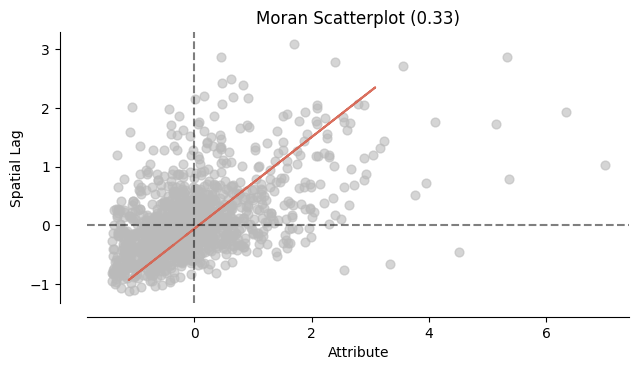

In [25]:
import geopandas as gpd
from libpysal.weights import Queen
from esda.moran import Moran
from splot.esda import moran_scatterplot

# Membaca data GeoDataFrame Anda
gdf = gpd.read_file(dataset)

# Membuat matriks tetangga dengan skema Queen
wq = Queen.from_dataframe(gdf)

# Menghitung Moran's I
mi = Moran(districts['Freq'], wq)

# Memplot scatterplot Moran's I
moran_scatterplot(mi)
plt.show()
